# Programming: Lasso

## 3

In [39]:
# --------------------- problem 3 -------------------------
import numpy as np
import matplotlib.pyplot as plt
from math import *

# constants n, d, k and sigma
N = 500
D = 1000
K = 100
SIGMA = 1

# generate data (x, y)
x = np.random.randn(N, D)
w = np.zeros(D)
for j in range(K): w[j] = (j+1)/K
epsl = SIGMA**2 * np.random.randn(N)
y = np.dot(x, w) + epsl

# compute a outside the loop (since it's unrelated to lambda, w and b)
a = np.zeros(D)
for k in range(D): a[k] = 2 * np.dot(x[:,k].T, x[:,k])

def calculate_lamb_max(X, Y):
    '''returns lambda_max'''
    lamb_list = 2 * np.mat([np.abs(np.dot(X.T, (Y-np.mean(Y))))])
    return np.max(lamb_list)

def lasso_loss(X, Y, W, B, Lamb):
    '''returns the regularization loss for Lasso'''
    L = np.dot((np.dot(X, W) + B - Y).T, (np.dot(X, W) + B - Y))\
        + Lamb * np.dot(W.T, W) 
    return L

def lasso_coordinate_descent(X, Y, W, Lamb, thres):
    '''coordinate descent for Lasso'''
    change = 10000
    a = np.zeros(D)
    c = np.zeros(D)
    
    while change > thres:
        
        W_temp = list(W)
        b = np.mean(Y - np.dot(X, W))
        for k in range(D):
            a[k] = 2 * np.dot(X[:,k].T, X[:,k])
            c[k] = 2 * np.dot(X[:,k].T, Y - (b + np.dot(X, W) \
                            - W[k] * X[:,k]))
            W[k] = (c[k] + Lamb) / a[k] if c[k] < -Lamb \
                   else (c[k] - Lamb) / a[k] if c[k] > Lamb \
                   else 0
        change = np.max(np.abs(W-W_temp))
        #print(Lamb, lasso_loss(X, Y, W, b, Lamb))
        #print(max(a))
    return W, b

In [40]:
lamb = calculate_lamb_max(x, y) # calculate lamb_max
w = np.zeros(D)

axes_x = []
axes_y = []
FDR = []
TPR =[]

#while np.count_nonzero(w) < len(w): # coordinate descent with decreasing lambda
while np.count_nonzero(w) < 0.99*D:
    w, b = lasso_coordinate_descent(x, y, w, lamb, 1e-3) 
    axes_x.append(lamb)
    axes_y.append(np.count_nonzero(w))
    if np.count_nonzero(w) > 0:
        FDR.append(np.count_nonzero(w[100:])/np.count_nonzero(w))
    else:
        FDR.append(0)        
    TPR.append(np.count_nonzero(w[0:100])/K)
    lamb /= 1.5
   

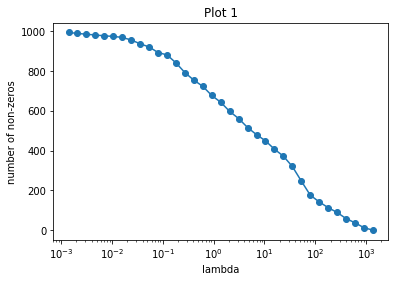

In [41]:
# plot 1
plt.figure()
plt.plot(axes_x, axes_y, 'o-')
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('number of non-zeros')
plt.title('Plot 1')
plt.show()

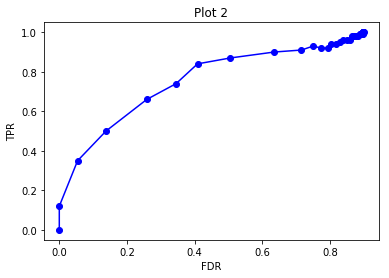

In [42]:
# plot 2
plt.figure()
plt.plot(FDR, TPR, 'bo-')
plt.xlabel('FDR')
plt.ylabel('TPR')
plt.title('Plot 2')
plt.show()

## 4 

In [97]:
# -------------------- problem 4 ----------------------------
import numpy as np
import matplotlib.pyplot as plt
from math import *
# Load a csv of floats:
X = np.genfromtxt("upvote_data.csv", delimiter=",")
# Load a text file of integers:
y = np.loadtxt("upvote_labels.txt", dtype=np.int)
# Load a text file of strings:
featureNames = open("upvote_features.txt").read().splitlines()

## 4.a

In [98]:
y = np.sqrt(y)

X_tr, y_tr = X[0:4000], y[0:4000]
X_va, y_va = X[4000:5000], y[4000:5000]
X_te, y_te = X[5000:], y[5000:]

In [99]:
D = len(X_tr[0])

def squared_error(X, Y, W, B):
    '''returns the regularization loss for Lasso'''
    L = 1/len(X) * np.dot((np.dot(X, W) + B - Y).T, (np.dot(X, W) + B - Y))
    return L

lamb = calculate_lamb_max(X_tr, y_tr) # calculate lamb_max
w = np.zeros(D)
lamb_list = []
train_error = []
valid_error = []
non_zero = []

count = 0
while count<30: # coordinate descent with decreasing lambda
    w, b = lasso_coordinate_descent(X_tr, y_tr, w, lamb, 0.2) 
    lamb_list.append(lamb)
    train_error.append(squared_error(X_tr, y_tr, w, b))
    valid_error.append(squared_error(X_va, y_va, w, b))
    non_zero.append(np.count_nonzero(w))
    lamb /= 1.5
    count+=1

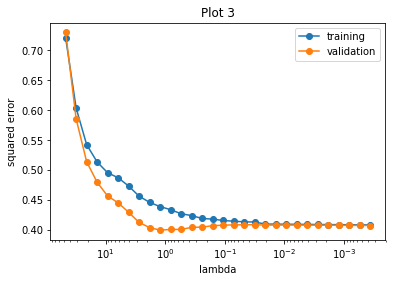

In [100]:
# plot 3
plt.figure()
plt.plot(lamb_list, train_error, 'o-', label = 'training')
plt.plot(lamb_list, valid_error, 'o-', label = 'validation')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('lambda')
plt.ylabel('squared error')
plt.title('Plot 3')
plt.legend(loc='upper right')
plt.show()

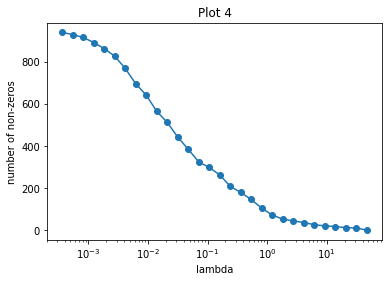

In [102]:
# plot 4
plt.figure()
plt.plot(lamb_list, non_zero, 'o-')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('lambda')
plt.ylabel('number of non-zeros')
plt.title('Plot 4')
plt.gca().invert_xaxis()
plt.legend(loc='upper right')
plt.show()

In [103]:
calculate_lamb_max(X_tr, y_tr)

46.778422725018636

## 4.b

In [105]:
print('The best lambda is %.3f' % lamb_list[valid_error.index(np.min(valid_error))])

The best lambda is 1.217


In [109]:
w, b = lasso_coordinate_descent(X_tr, y_tr, np.zeros(D), 1.217, 0.2) 
print('The training error is %.2f' % train_error[valid_error.index(np.min(valid_error))])
print('The validation error is %.2f' % valid_error[valid_error.index(np.min(valid_error))])
print('The test error is %.2f' % squared_error(X_te, y_te, w, b))

The training error is 0.44
The validation error is 0.40
The test error is 0.48


In [110]:
b

0.82670108925296226

In [107]:
ww = np.sort(w)[::-1]
fts_max = []
for j in range(10):
    index = list(w).index(ww[j])
    fts_max.append(featureNames[index])
print(fts_max)

['sqrt(UserCoolVotes*BusinessNumStars)', 'log(ReviewNumCharacters*UserUsefulVotes)', 'log(ReviewNumLineBreaks*UserCoolVotes)', 'sqrt(ReviewNumCharacters*UserFunnyVotes)', 'log(UserUsefulVotes)', 'sqrt(ReviewNumCharacters*UserCoolVotes)', 'log(UserCoolVotes*BusinessIsOpen)', 'sqrt(ReviewNumWords*UserUsefulVotes)', 'BusinessNumReviews*InGlendale', 'sqrt(UserCoolVotes*IsRestaurant)']


# Binary Logistic Regression

## 5

In [1]:
# -------------------- problem 5 ------------------------------
import numpy as np
from mnist import MNIST
import math
import matplotlib.pyplot as plt

mndata = MNIST('./data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

In [2]:
seven_index_train = np.argwhere(labels_train == 7)
two_index_train = np.argwhere(labels_train == 2)

seven_index_test = np.argwhere(labels_test == 7)
two_index_test = np.argwhere(labels_test == 2)

In [3]:
X_tr = np.zeros(shape = [len(seven_index_train) + len(two_index_train), len(X_train[0])])
y_tr = np.zeros(shape = [len(seven_index_train) + len(two_index_train), 1])

X_te = np.zeros(shape = [len(seven_index_test) + len(two_index_test), len(X_test[0])])
y_te = np.zeros(shape = [len(seven_index_test) + len(two_index_test), 1])

In [4]:
k = 0
for j in range(len(labels_train)):
    if j in seven_index_train:
        y_tr[k] = 1
        X_tr[k] = X_train[j]
        k += 1
    if j in two_index_train:
        y_tr[k] = -1
        X_tr[k] = X_train[j]
        k += 1
        
k = 0
for j in range(len(labels_test)):
    if j in seven_index_test:
        y_te[k] = 1
        X_te[k] = X_test[j]
        k += 1
    if j in two_index_test:
        y_te[k] = -1
        X_te[k] = X_test[j]
        k += 1

## 5.b(a)

In [5]:
def mu(X, Y, W, B):
    return 1 / (1 + np.exp((B + np.dot(X,W)) * Y))

def ridge_loss(X, Y, W, B, Lamb):
    J = np.mean(np.log(1+np.exp(-Y *(B + np.dot(X,W))))) + Lamb*np.dot(W.T, W)
    return float(J)
    
def gradient_descent(X, Y, Lamb, Eta):
    w = np.zeros(shape=[len(X_tr[0]),1])
    b = 0
    
    w_list = []
    b_list = []
    Loss=[]
    
    w_list.append(w)
    b_list.append(b)    
    Loss.append(ridge_loss(X,Y,w,b,Lamb))
    
    change = 100
    while (change>2e-4):
        w_next = w - Eta * (-1/len(X) * (np.dot(X.T, Y*mu(X,Y,w,b)))\
                            + 2*Lamb*w)
        b_next = b - Eta * (-1/len(X) * np.dot(Y.T, mu(X,Y,w,b)))  
        
        change = np.max(np.abs(w_next-w))
        w = w_next
        b = b_next    
        
        w_list.append(w)
        b_list.append(b) 
        Loss.append(ridge_loss(X,Y,w,b,Lamb))
        
    return w_list,b_list,Loss

In [6]:
eta = 0.5
lamb = 0.1
w,b,loss = gradient_descent(X_tr, y_tr, lamb, eta)

In [7]:
train_loss = loss
test_loss = []
for j in range(len(loss)):
    test_loss.append(ridge_loss(X_te, y_te, w[j], b[j], 0.1))

In [8]:
steps = list(range(len(loss)))

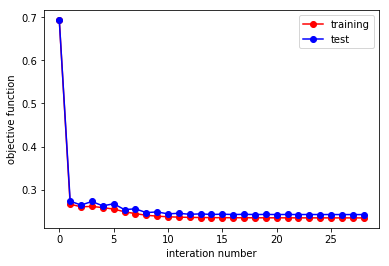

In [9]:
plt.figure()
plt.plot(steps[:], train_loss[:], 'ro-', label = 'training')
plt.plot(steps[:], test_loss[:], 'bo-', label = 'test')
plt.xlabel('interation number')
plt.ylabel('objective function')
plt.legend(loc='upper right')
plt.show()

## 5.b(b)

In [10]:
train_error = []
test_error = []

for j in range(len(steps)):
    pre_tr = np.sign(b[j]+np.dot(X_tr, w[j]))
    pre_te = np.sign(b[j]+np.dot(X_te, w[j]))
    
    train_error.append(sum(pre_tr != y_tr)/len(y_tr))
    test_error.append(sum(pre_te != y_te)/len(y_te))

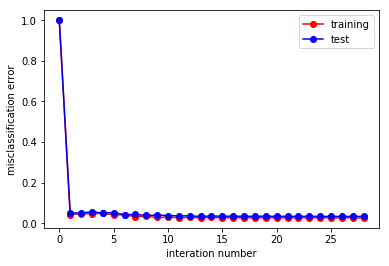

In [14]:
plt.figure()
plt.plot(steps[:], train_error[:], 'ro-', label = 'training')
plt.plot(steps[:], test_error[:], 'bo-', label = 'test')
plt.xlabel('interation number')
plt.ylabel('misclassification error')
plt.legend(loc='upper right')
plt.show()

## 5.c

In [15]:
def sgd(X, Y, Lamb, Eta, batch_size, threshold):
    w = np.zeros(shape=[len(X_tr[0]),1])
    b = 0
    
    w_list = []
    b_list = []
    Loss=[]
    
    w_list.append(w)
    b_list.append(b)    
    Loss.append(ridge_loss(X,Y,w,b,Lamb))
    
    change =10000
    while (change>threshold):
        
        j = np.random.randint(0, len(X_tr), batch_size)
        
        w_next = w - Eta * (-1/len(X[j]) * \
                            (np.dot(X[j].T, Y[j]*mu(X[j],Y[j],w,b)))\
                            + 2*Lamb*w)
        b_next = b - Eta * (-1/len(X[j]) * \
                            np.dot(Y[j].T, mu(X[j],Y[j],w,b))) 
        
        change = np.max(np.abs(w_next-w))
        
        w = np.array(w_next)
        b = b_next    
        
        w_list.append(w)
        b_list.append(b) 
        Loss.append(ridge_loss(X,Y,w,b,Lamb))
        
    return w_list,b_list,Loss

In [16]:
eta = 0.01
lamb = 0.1
w,b,loss = sgd(X_tr, y_tr, lamb, eta, 1, 2e-4)

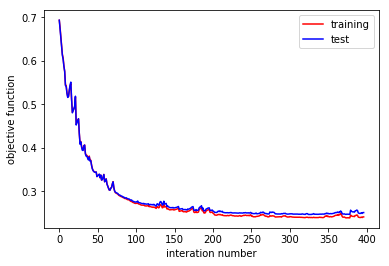

In [19]:
train_loss = loss
test_loss = []
for j in range(len(loss)):
    test_loss.append(ridge_loss(X_te, y_te, w[j], b[j], 0.1))

steps = list(range(len(loss)))

plt.figure()
plt.plot(steps[:], train_loss[:], 'r-', label = 'training')
plt.plot(steps[:], test_loss[:], 'b-', label = 'test')
plt.xlabel('interation number')
plt.ylabel('objective function')
plt.legend(loc='upper right')
plt.show()

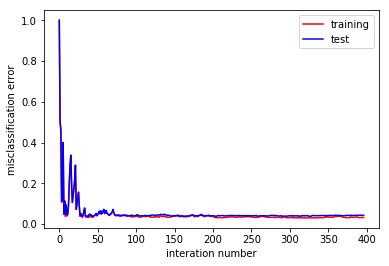

In [20]:
train_error = []
test_error = []

for j in range(len(steps)):
    pre_tr = np.sign(b[j]+np.dot(X_tr, w[j]))
    pre_te = np.sign(b[j]+np.dot(X_te, w[j]))
    
    train_error.append(sum(pre_tr != y_tr)/len(y_tr))
    test_error.append(sum(pre_te != y_te)/len(y_te))

plt.figure()
plt.plot(steps[:], train_error[:], 'r-', label = 'training')
plt.plot(steps[:], test_error[:], 'b-', label = 'test')
plt.xlabel('interation number')
plt.ylabel('misclassification error')
plt.legend(loc='upper right')
plt.show()

## 5.d

In [21]:
eta = 0.02
lamb = 0.1
w,b,loss = sgd(X_tr, y_tr, lamb, eta, 100, 3e-4)

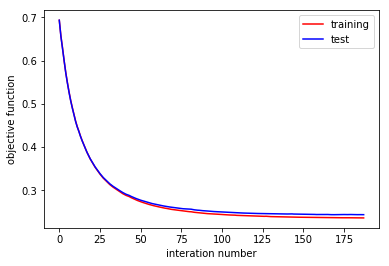

In [22]:
train_loss = loss
test_loss = []
for j in range(len(loss)):
    test_loss.append(ridge_loss(X_te, y_te, w[j], b[j], 0.1))

steps = list(range(len(loss)))

plt.figure()
plt.plot(steps[:], train_loss[:], 'r-', label = 'training')
plt.plot(steps[:], test_loss[:], 'b-', label = 'test')
plt.xlabel('interation number')
plt.ylabel('objective function')
plt.legend(loc='upper right')
plt.show()

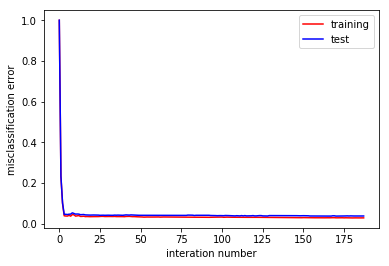

In [23]:
train_error = []
test_error = []

for j in range(len(steps)):
    pre_tr = np.sign(b[j]+np.dot(X_tr, w[j]))
    pre_te = np.sign(b[j]+np.dot(X_te, w[j]))
    
    train_error.append(sum(pre_tr != y_tr)/len(y_tr))
    test_error.append(sum(pre_te != y_te)/len(y_te))

plt.figure()
plt.plot(steps[:], train_error[:], 'r-', label = 'training')
plt.plot(steps[:], test_error[:], 'b-', label = 'test')
plt.xlabel('interation number')
plt.ylabel('misclassification error')
plt.legend(loc='upper right')
plt.show()

## 5.e

In [24]:
import scipy.linalg as lg

def newton_method(X, Y, Lamb, Eta):
    w = np.zeros(shape=[len(X_tr[0]),1])
    b = 0
    
    w_list = []
    b_list = []
    Loss=[]
    
    w_list.append(w)
    b_list.append(b)    
    Loss.append(ridge_loss(X,Y,w,b,Lamb))
    
    change =10000
    while len(Loss)<=1 or (abs(Loss[-1] - Loss[-2])>1e-5):
    #while change > 2e-4:
        Mu = mu(X,Y,w,b)
        grad_w = -1/len(X) * (np.dot(X.T, Y*Mu)) + 2*Lamb*w
        hessian_w = 1/len(X) * np.dot(X.T, X*(Mu*(1-Mu))) \
                    + 2*Lamb*np.eye(len(X[0]))
        
        grad_b = -1/len(X) * np.dot(Y.T, Mu) 
        hessian_b = np.mean(Mu*(1-Mu))
        
        v_w = lg.solve(hessian_w, grad_w)
        v_b = lg.solve(hessian_b, grad_b)
        
        w -= Eta * np.reshape(v_w, (len(w),1))
        b -= Eta * float(v_b)
        
        w_list.append(np.array(w))
        b_list.append(b) 
        Loss.append(ridge_loss(X,Y,np.array(w),b,Lamb))
        
    
    return w_list, b_list, Loss
        

In [25]:
eta = 1
lamb = 0.1
w,b,loss = newton_method(X_tr, y_tr, lamb, eta)

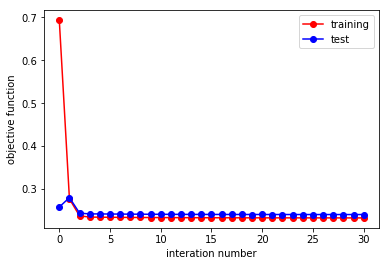

In [26]:
train_loss = loss
test_loss = []
for j in range(len(loss)):
    test_loss.append(ridge_loss(X_te, y_te, np.array(w[j]), b[j], 0.1))
steps = list(range(len(loss)))

plt.figure()
plt.plot(steps[:], train_loss[:], 'ro-', label = 'training')
plt.plot(steps[:], test_loss[:], 'bo-', label = 'test')
plt.xlabel('interation number')
plt.ylabel('objective function')
plt.legend(loc='upper right')
plt.show()

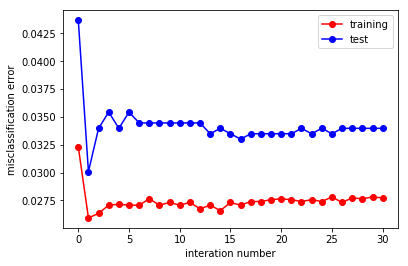

In [27]:
train_error = []
test_error = []

for j in range(len(steps)):
    pre_tr = np.sign(b[j]+np.dot(X_tr, w[j]))
    pre_te = np.sign(b[j]+np.dot(X_te, w[j]))
    
    train_error.append(sum(pre_tr != y_tr)/len(y_tr))
    test_error.append(sum(pre_te != y_te)/len(y_te))

plt.figure()
plt.plot(steps[:], train_error[:], 'ro-', label = 'training')
plt.plot(steps[:], test_error[:], 'bo-', label = 'test')
plt.xlabel('interation number')
plt.ylabel('misclassification error')
plt.legend(loc='upper right')
plt.show()

In [34]:
b[11]

0.30948921195647794

In [31]:
w[10][100]

array([-0.01852627])